In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('./data/train.csv')

In [3]:
df

,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750
...,...,...,...,...,...,...,...,...,...
1780,ID983582017__Dry_Clover_g,train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Clover_g,0.0000
1781,ID983582017__Dry_Dead_g,train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Dead_g,0.0000
1782,ID983582017__Dry_Green_g,train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Green_g,40.9400
1783,ID983582017__Dry_Total_g,train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Total_g,40.9400


In [4]:
df['sample_id'].nunique()

1785

In [5]:
df["target_name"].value_counts()

target_name
Dry_Clover_g    357
Dry_Dead_g      357
Dry_Green_g     357
Dry_Total_g     357
GDM_g           357
Name: count, dtype: int64

In [6]:
df.isna().sum()


sample_id        0
image_path       0
Sampling_Date    0
State            0
Species          0
Pre_GSHH_NDVI    0
Height_Ave_cm    0
target_name      0
target           0
dtype: int64

array([[<Axes: title={'center': 'Pre_GSHH_NDVI'}>,
        <Axes: title={'center': 'Height_Ave_cm'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

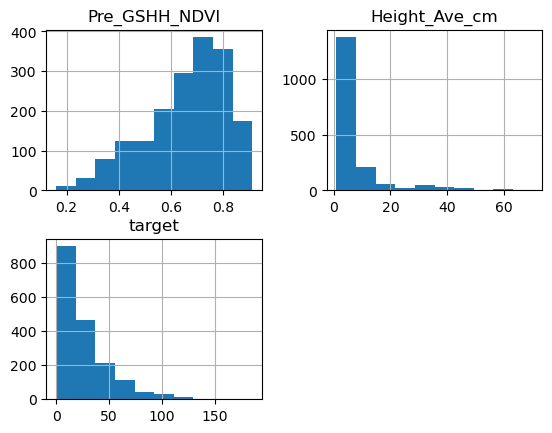

In [7]:
df.hist()

In [8]:
df["image_id"] = df["sample_id"].str.split("__").str[0]
df["target_name"] = df["sample_id"].str.split("__").str[1]


In [9]:
df_features = (
    df[
        ["image_id", "Sampling_Date", "State", "Species",
         "Pre_GSHH_NDVI", "Height_Ave_cm"]
    ]
    .drop_duplicates("image_id")
)


In [10]:
df_targets = (
    df[["image_id", "target_name", "target"]]
    .pivot(index="image_id", columns="target_name", values="target")
    .reset_index()
)


In [11]:
df_wide = df_features.merge(df_targets, on="image_id", how="inner")
df_wide

,image_id,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,Dry_Clover_g,Dry_Dead_g,Dry_Green_g,Dry_Total_g,GDM_g
0,ID1011485656,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,0.0000,31.9984,16.2751,48.2735,16.2750
1,ID1012260530,2015/4/1,NSW,Lucerne,0.55,16.0000,0.0000,0.0000,7.6000,7.6000,7.6000
2,ID1025234388,2015/9/1,WA,SubcloverDalkeith,0.38,1.0000,6.0500,0.0000,0.0000,6.0500,6.0500
3,ID1028611175,2015/5/18,Tas,Ryegrass,0.66,5.0000,0.0000,30.9703,24.2376,55.2079,24.2376
4,ID1035947949,2015/9/11,Tas,Ryegrass,0.54,3.5000,0.4343,23.2239,10.5261,34.1844,10.9605
...,...,...,...,...,...,...,...,...,...,...,...
352,ID975115267,2015/7/8,WA,Clover,0.73,3.0000,40.0300,0.0000,0.8000,40.8300,40.8300
353,ID978026131,2015/9/4,Tas,Clover,0.83,3.1667,24.6445,4.1948,12.0601,40.8994,36.7046
354,ID980538882,2015/2/24,NSW,Phalaris,0.69,29.0000,0.0000,1.1457,91.6543,92.8000,91.6543
355,ID980878870,2015/7/8,WA,Clover,0.74,2.0000,32.3575,0.0000,2.0325,34.3900,34.3900


In [12]:
targets_long = df[["image_id", "target_name", "target"]]
features = df.drop(columns=["target_name", "target"]).drop_duplicates("image_id")


In [13]:
df_wide.head()
df_wide.isna().sum()


image_id         0
Sampling_Date    0
State            0
Species          0
Pre_GSHH_NDVI    0
Height_Ave_cm    0
Dry_Clover_g     0
Dry_Dead_g       0
Dry_Green_g      0
Dry_Total_g      0
GDM_g            0
dtype: int64

In [14]:
df_wide.shape

(357, 11)

In [15]:
df_wide.duplicated(subset="image_id").sum()


np.int64(0)

In [16]:
df_wide.isna().sum()


image_id         0
Sampling_Date    0
State            0
Species          0
Pre_GSHH_NDVI    0
Height_Ave_cm    0
Dry_Clover_g     0
Dry_Dead_g       0
Dry_Green_g      0
Dry_Total_g      0
GDM_g            0
dtype: int64

In [17]:
df_wide.describe().T


,count,mean,std,min,25%,50%,75%,max
Pre_GSHH_NDVI,357.0,0.657423,0.152142,0.16,0.5600,0.6900,0.7700,0.9100
Height_Ave_cm,357.0,7.595985,10.285262,1.00,3.0000,4.0000,7.0000,70.0000
Dry_Clover_g,357.0,6.649692,12.117761,0.00,0.0000,1.4235,7.2429,71.7865
Dry_Dead_g,357.0,12.044548,12.402007,0.00,3.2000,7.9809,17.6378,83.8407
Dry_Green_g,357.0,26.624722,25.401232,0.00,8.8000,20.8000,35.0834,157.9836
Dry_Total_g,357.0,45.318097,27.984015,1.04,25.2715,40.3000,57.8800,185.7000
GDM_g,357.0,33.274414,24.935822,1.04,16.0261,27.1082,43.6757,157.9836


array([[<Axes: title={'center': 'Pre_GSHH_NDVI'}>,
        <Axes: title={'center': 'Height_Ave_cm'}>,
        <Axes: title={'center': 'Dry_Clover_g'}>],
       [<Axes: title={'center': 'Dry_Dead_g'}>,
        <Axes: title={'center': 'Dry_Green_g'}>,
        <Axes: title={'center': 'Dry_Total_g'}>],
       [<Axes: title={'center': 'GDM_g'}>, <Axes: >, <Axes: >]],
      dtype=object)

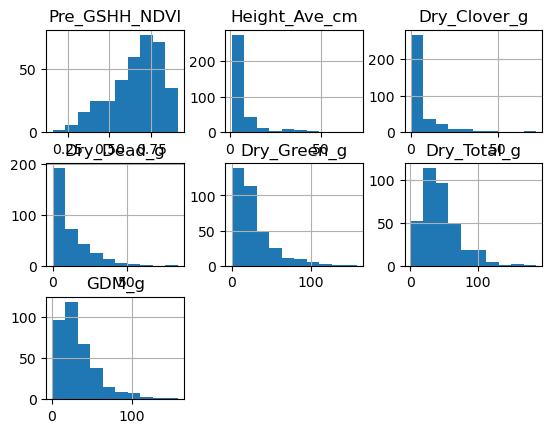

In [18]:
df_wide.hist()

<Axes: >

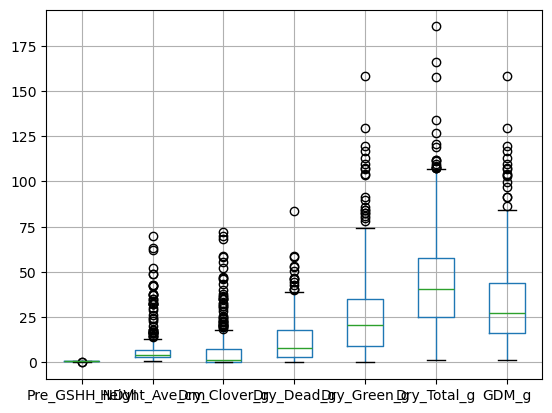

In [19]:
df_wide.boxplot()

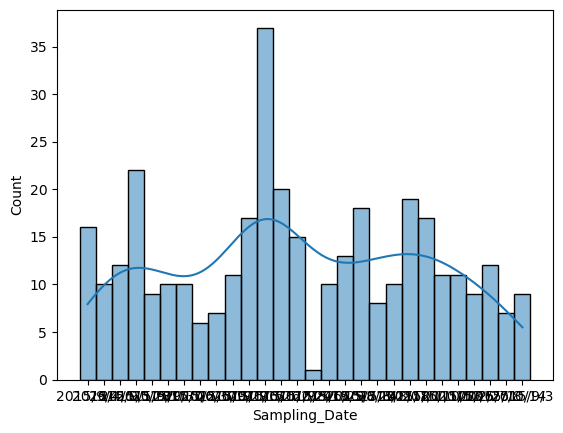

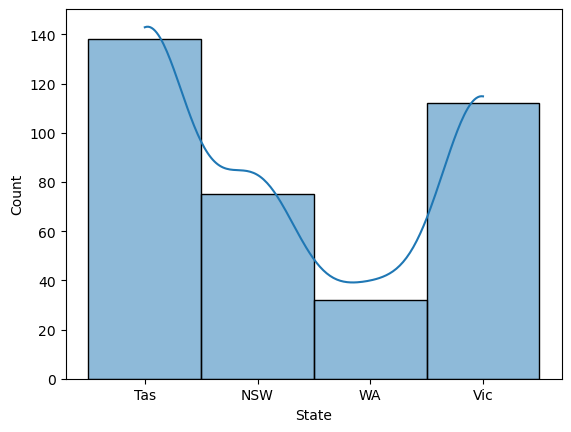

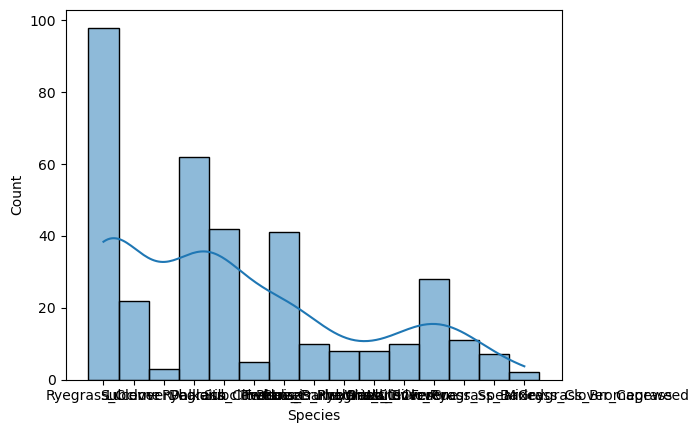

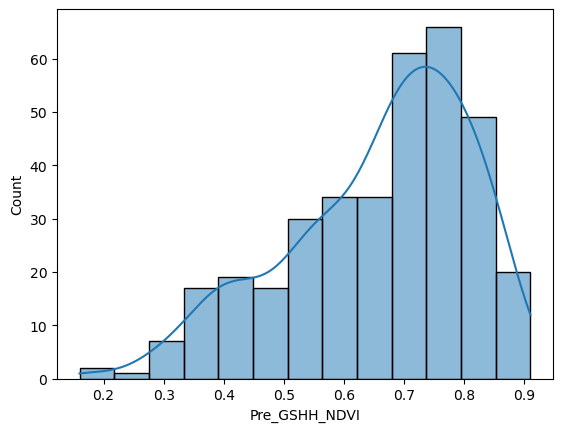

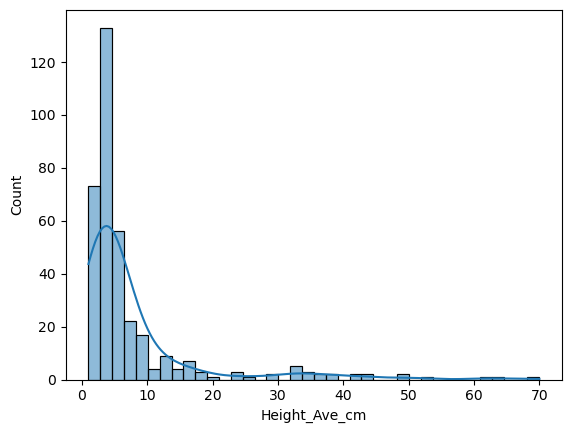

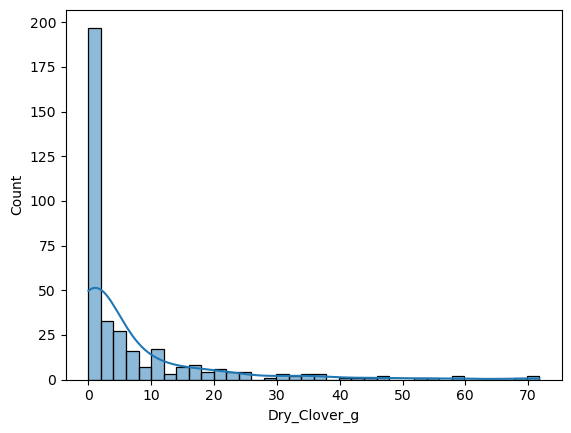

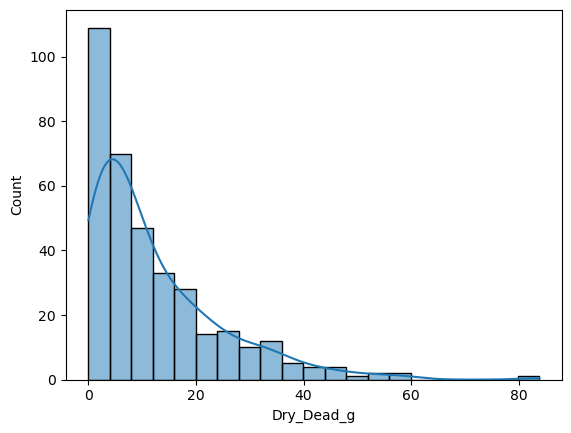

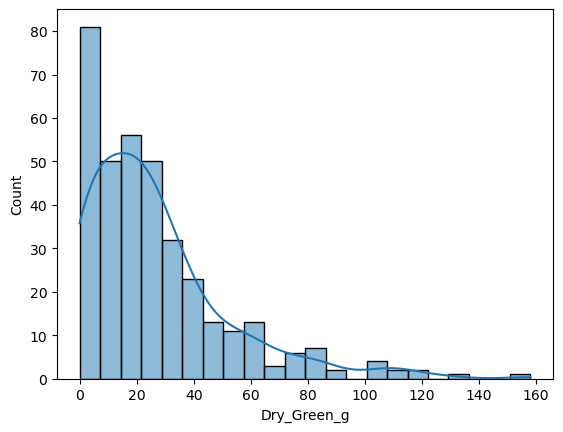

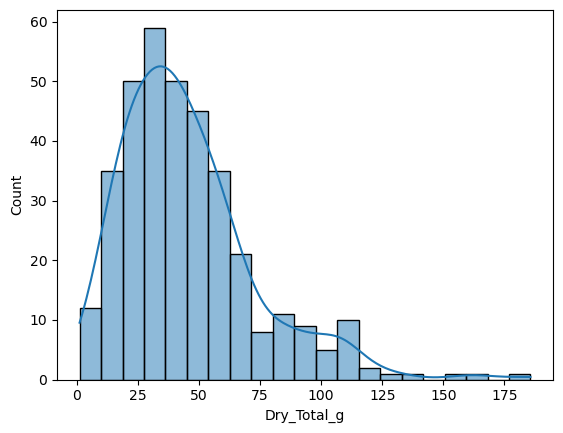

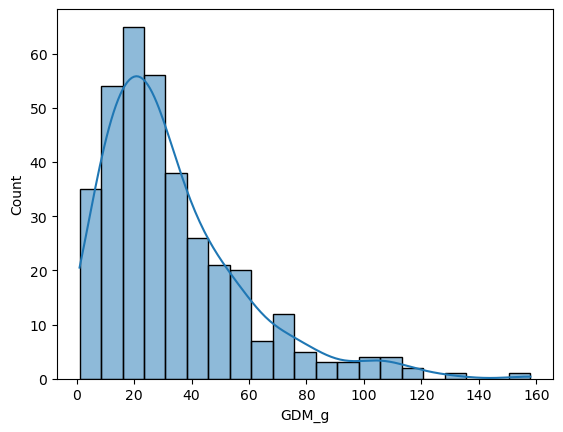

In [20]:
for column in df_wide.drop(columns=['image_id']).columns:
    sns.histplot(df_wide[column], kde=True)
    plt.show()
    plt.close()


In [21]:
df.corr(numeric_only=True)


,Pre_GSHH_NDVI,Height_Ave_cm,target
Pre_GSHH_NDVI,1.000000,0.238434,0.246426
Height_Ave_cm,0.238434,1.000000,0.327695
target,0.246426,0.327695,1.000000


In [22]:
# nombres por convenio
targets = ["Dry_Green_g","Dry_Dead_g","Dry_Clover_g","GDM_g","Dry_Total_g"]

# checks
print("shape:", df_wide.shape)
print("nan per column:\n", df_wide.isna().sum())
print("duplicated images:", df_wide.duplicated("image_id").sum())
print("targets nulls:\n", df_wide[targets].isna().sum())


shape: (357, 11)
nan per column:
 image_id         0
Sampling_Date    0
State            0
Species          0
Pre_GSHH_NDVI    0
Height_Ave_cm    0
Dry_Clover_g     0
Dry_Dead_g       0
Dry_Green_g      0
Dry_Total_g      0
GDM_g            0
dtype: int64
duplicated images: 0
targets nulls:
 Dry_Green_g     0
Dry_Dead_g      0
Dry_Clover_g    0
GDM_g           0
Dry_Total_g     0
dtype: int64


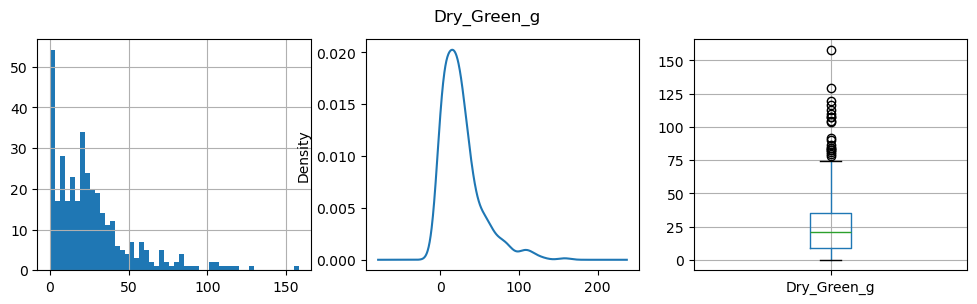

Dry_Green_g zeros_pct: 0.05042016806722689 skew: 1.7514455052189946


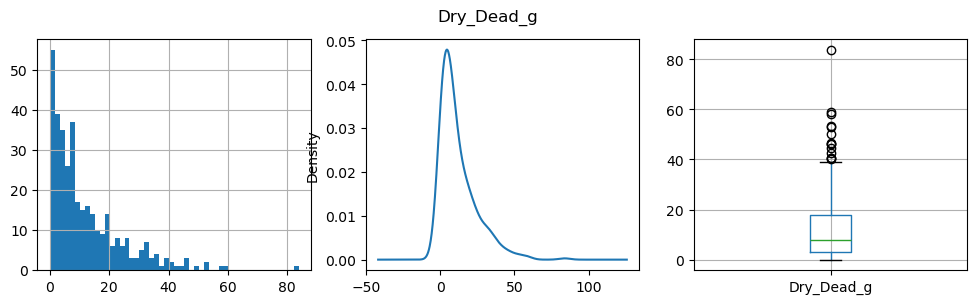

Dry_Dead_g zeros_pct: 0.11204481792717087 skew: 1.7613667806611064


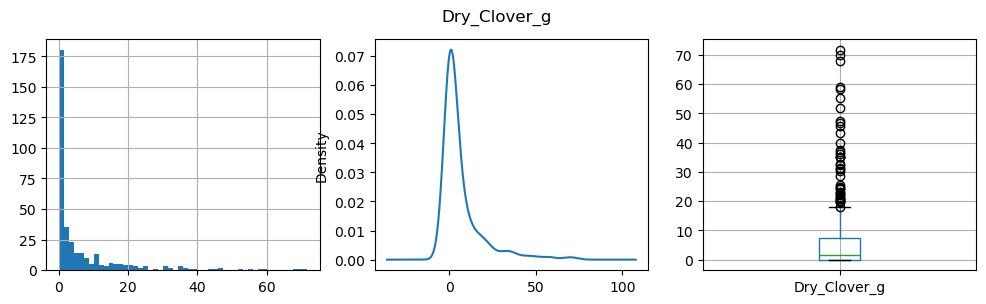

Dry_Clover_g zeros_pct: 0.37815126050420167 skew: 2.841982362787661


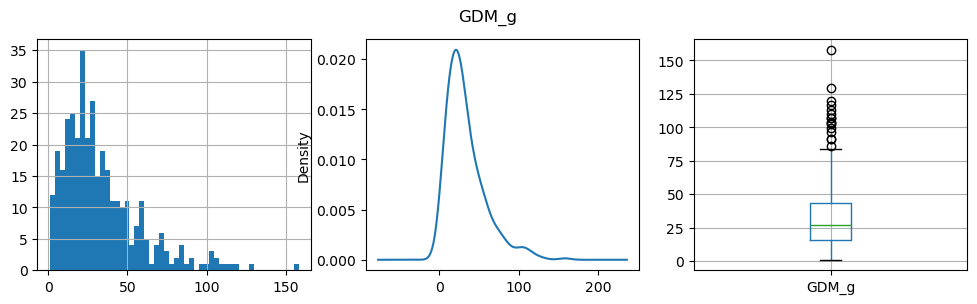

GDM_g zeros_pct: 0.0 skew: 1.5590328001560023


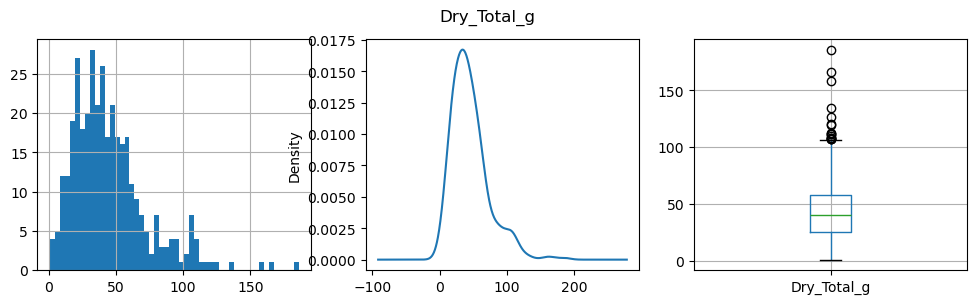

Dry_Total_g zeros_pct: 0.0 skew: 1.4285259267259003


In [23]:
import matplotlib.pyplot as plt
df_wide[targets].describe().T

for t in targets:
    fig, ax = plt.subplots(1,3, figsize=(12,3))
    df_wide[t].hist(ax=ax[0], bins=50)
    df_wide[t].plot(kind="kde", ax=ax[1])
    df_wide.boxplot(column=t, ax=ax[2])
    plt.suptitle(t)
    plt.show()
    print(t, "zeros_pct:", (df_wide[t]==0).mean(), "skew:", df_wide[t].skew())


              Dry_Green_g  Dry_Dead_g  Dry_Clover_g     GDM_g  Dry_Total_g
Dry_Green_g      1.000000    0.095554     -0.276582  0.884257     0.830315
Dry_Dead_g       0.095554    1.000000     -0.175548  0.012028     0.453912
Dry_Clover_g    -0.276582   -0.175548      1.000000  0.204213     0.104185
GDM_g            0.884257    0.012028      0.204213  1.000000     0.896441
Dry_Total_g      0.830315    0.453912      0.104185  0.896441     1.000000


<Axes: >

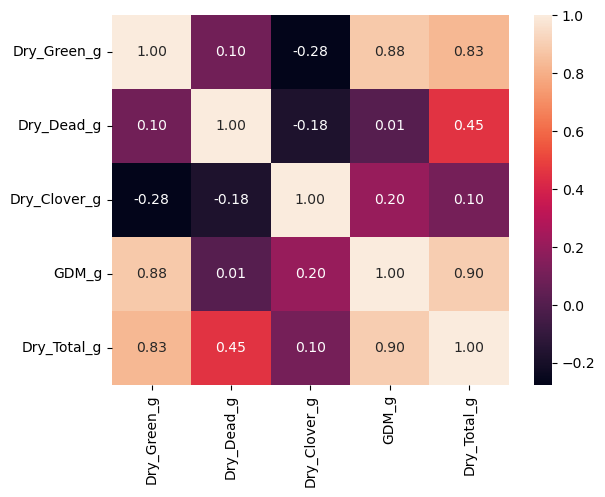

In [24]:
corr = df_wide[targets].corr()
print(corr)
import seaborn as sns
sns.heatmap(corr, annot=True, fmt=".2f")


Pre_GSHH_NDVI Dry_Green_g 0.3510540523101968
Pre_GSHH_NDVI Dry_Dead_g -0.12281830903794266
Pre_GSHH_NDVI Dry_Clover_g 0.2241501007845316
Pre_GSHH_NDVI GDM_g 0.4665337423592803
Pre_GSHH_NDVI Dry_Total_g 0.36129072067217244
Height_Ave_cm Dry_Green_g 0.6484394128672004
Height_Ave_cm Dry_Dead_g -0.04972107878901207
Height_Ave_cm Dry_Clover_g -0.16013789054278485
Height_Ave_cm GDM_g 0.5827218248941097
Height_Ave_cm Dry_Total_g 0.4972264958855343


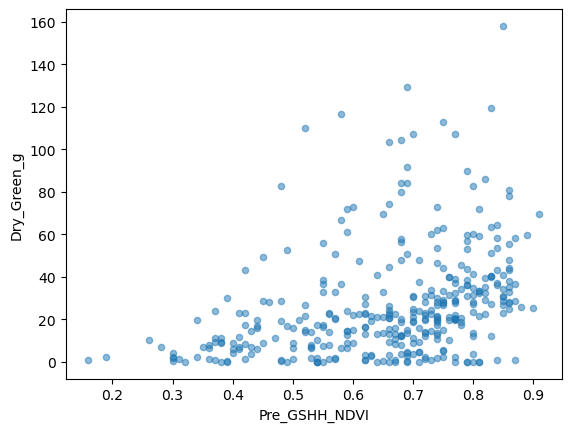

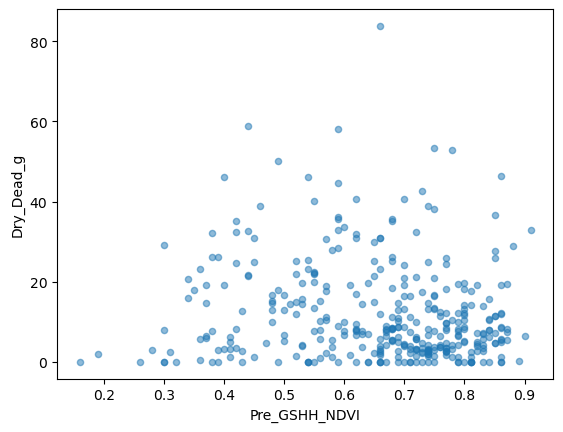

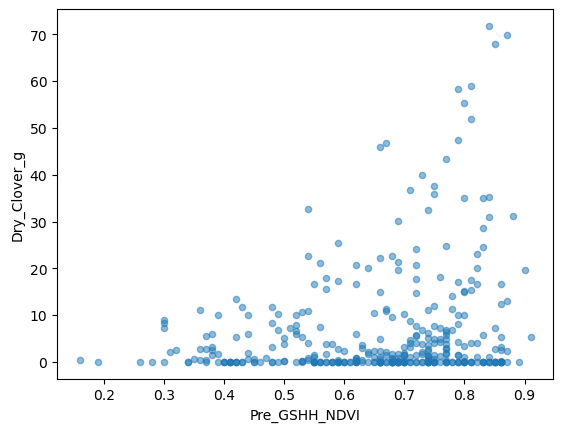

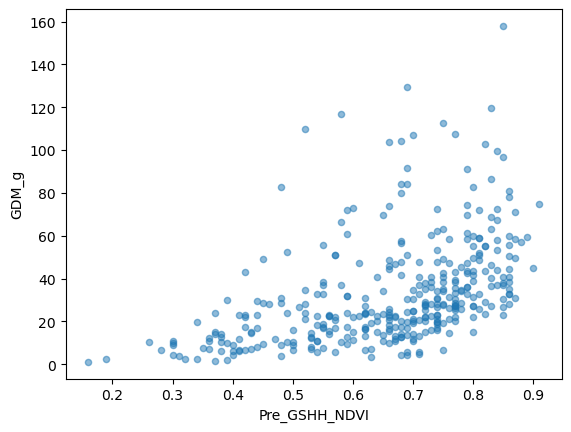

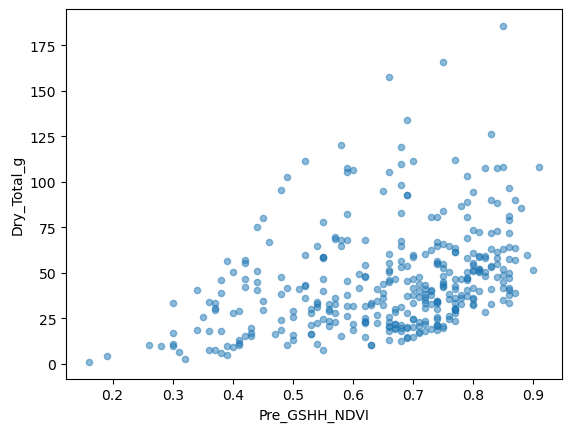

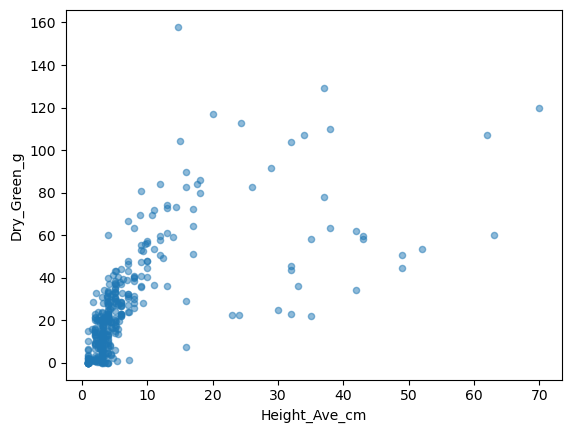

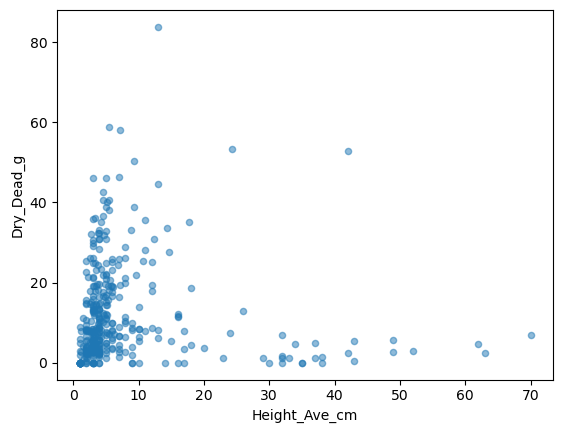

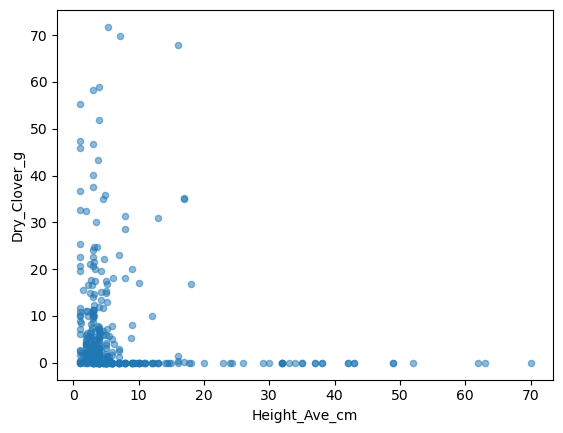

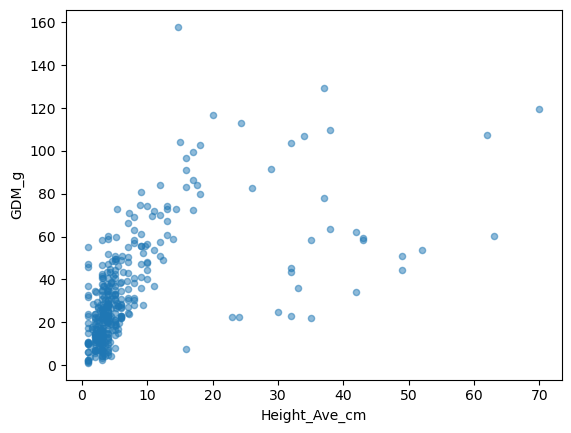

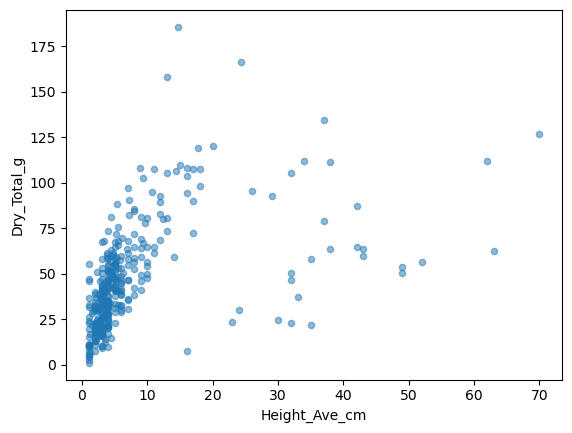

In [25]:
num_feats = ["Pre_GSHH_NDVI","Height_Ave_cm"]
for f in num_feats:
    for t in targets:
        print(f, t, df_wide[[f,t]].corr().iloc[0,1])
        df_wide.plot.scatter(x=f,y=t, alpha=0.5)


In [26]:
# ejemplo para species multilabel
species_split = df_wide["Species"].str.split("_")
unique_sp = sorted({s for row in species_split for s in row})
for s in unique_sp:
    df_wide["sp_"+s] = df_wide["Species"].apply(lambda x: int(s in x.split("_")))


In [27]:
df_wide["sum_components"] = df_wide["Dry_Green_g"] + df_wide["Dry_Dead_g"] + df_wide["Dry_Clover_g"]
df_wide["error_total"] = df_wide["Dry_Total_g"] - df_wide["sum_components"]
df_wide["error_total"].describe()


count    357.000000
mean      -0.000866
std        0.016343
min       -0.308800
25%        0.000000
50%        0.000000
75%        0.000000
max        0.000100
Name: error_total, dtype: float64

Dry_Total_g siempre es la suma de las otras 4 columnas, por lo que puede ser descartado

<Axes: >

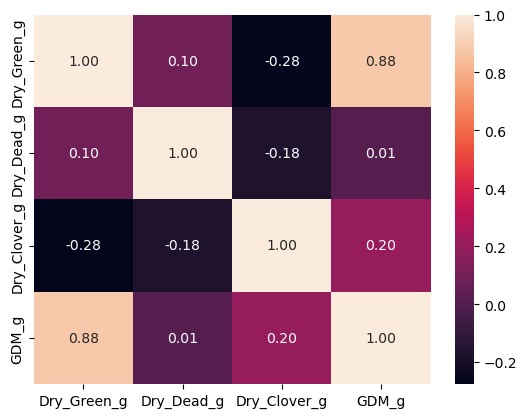

In [28]:
train_targets = ["Dry_Green_g","Dry_Dead_g","Dry_Clover_g","GDM_g"]

sns.heatmap(df_wide[train_targets].corr(), annot=True, fmt=".2f")


In [29]:
print(df_wide)

         image_id Sampling_Date State            Species  Pre_GSHH_NDVI  \
0    ID1011485656      2015/9/4   Tas    Ryegrass_Clover           0.62   
1    ID1012260530      2015/4/1   NSW            Lucerne           0.55   
2    ID1025234388      2015/9/1    WA  SubcloverDalkeith           0.38   
3    ID1028611175     2015/5/18   Tas           Ryegrass           0.66   
4    ID1035947949     2015/9/11   Tas           Ryegrass           0.54   
..            ...           ...   ...                ...            ...   
352   ID975115267      2015/7/8    WA             Clover           0.73   
353   ID978026131      2015/9/4   Tas             Clover           0.83   
354   ID980538882     2015/2/24   NSW           Phalaris           0.69   
355   ID980878870      2015/7/8    WA             Clover           0.74   
356   ID983582017      2015/9/1    WA           Ryegrass           0.64   

     Height_Ave_cm  Dry_Clover_g  Dry_Dead_g  Dry_Green_g  Dry_Total_g  ...  \
0           4.6667  

In [30]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib


In [31]:
COMP_TARGETS = ["Dry_Green_g","Dry_Dead_g","Dry_Clover_g","GDM_g"]


In [32]:
def reconstruct_total(df):
    df["Dry_Total_g"] = (
        df["Dry_Green_g"] +
        df["Dry_Dead_g"] +
        df["Dry_Clover_g"]
    )
    return df


In [33]:
NUM_FEATS = ["Pre_GSHH_NDVI","Height_Ave_cm"]
CAT_FEATS = ["State"]
SPECIES_FEATS = [c for c in df_wide.columns if c.startswith("sp_")]

FEATS = NUM_FEATS + CAT_FEATS + SPECIES_FEATS


In [34]:
from sklearn.model_selection import GroupKFold

n_groups = df_wide["State"].nunique()  # debe ser 4
gkf = GroupKFold(n_splits=n_groups)

df_wide["fold"] = -1
for f, (tr, val) in enumerate(gkf.split(df_wide, groups=df_wide["State"])):
    df_wide.loc[val, "fold"] = f


In [35]:
df_model = df_wide.copy()

# One-hot para State
df_model = pd.get_dummies(df_model, columns=["State"], drop_first=True)

# Escalado numérico
scaler = StandardScaler()
df_model[NUM_FEATS] = scaler.fit_transform(df_model[NUM_FEATS])
joblib.dump(scaler,"scaler_tabular.pkl")


['scaler_tabular.pkl']

In [36]:
print(df_wide["fold"].value_counts())
print(df_wide.groupby("fold")["State"].nunique())
print(df_wide.groupby("fold").size())


fold
0    138
1    112
2     75
3     32
Name: count, dtype: int64
fold
0    1
1    1
2    1
3    1
Name: State, dtype: int64
fold
0    138
1    112
2     75
3     32
dtype: int64


In [37]:
targets = [
    "Dry_Green_g",
    "Dry_Dead_g",
    "Dry_Clover_g",
    "GDM_g",
    "Dry_Total_g"
]

features = [
    "Pre_GSHH_NDVI",
    "Height_Ave_cm",
    "sp_Mixed",
    "sp_Phalaris",
    "sp_Ryegrass",
    "sp_SilverGrass",
    "sp_SpearGrass",
    "sp_SubcloverDalkeith",
    "sp_SubcloverLosa",
    "sp_WhiteClover"
]


In [38]:
import lightgbm as lgb
import numpy as np
import joblib

oof = np.zeros((len(df_wide), len(targets)))

for i, tgt in enumerate(targets):
    print(f"\n==============================")
    print(f"Training target: {tgt}")
    
    for f in sorted(df_wide.fold.unique()):
        tr_idx = df_wide.fold != f
        val_idx = df_wide.fold == f

        X_tr  = df_wide.loc[tr_idx, features]
        y_tr  = df_wide.loc[tr_idx, tgt]
        X_val = df_wide.loc[val_idx, features]
        y_val = df_wide.loc[val_idx, tgt]

        print(f"Fold {f} | Train: {X_tr.shape} | Val: {X_val.shape}")

        # 🔍 PROTECCIÓN CONTRA FOLDS VACÍOS (por si acaso)
        if X_val.shape[0] == 0:
            raise RuntimeError(f"Fold {f} está vacío. Revisa la asignación de folds.")

        dtrain = lgb.Dataset(X_tr.values, label=y_tr.values)
        dval   = lgb.Dataset(X_val.values, label=y_val.values)

        params = {
            "objective": "regression",
            "metric": "rmse",
            "learning_rate": 0.03,
            "num_leaves": 64,
            "feature_fraction": 0.9,
            "bagging_fraction": 0.8,
            "bagging_freq": 1,
            "min_data_in_leaf": 10,
            "verbosity": -1
        }

        callbacks = [
            lgb.early_stopping(150),
            lgb.log_evaluation(200)
        ]

        model = lgb.train(
            params,
            dtrain,
            num_boost_round=5000,
            valid_sets=[dval],
            callbacks=callbacks
        )

        joblib.dump(model, f"lgb_{tgt}_fold{f}.pkl")
        oof[val_idx, i] = model.predict(X_val.values)



Training target: Dry_Green_g
Fold 0 | Train: (219, 10) | Val: (138, 10)
Training until validation scores don't improve for 150 rounds


[200]	valid_0's rmse: 11.077
Early stopping, best iteration is:
[126]	valid_0's rmse: 10.7217
Fold 1 | Train: (245, 10) | Val: (112, 10)
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[31]	valid_0's rmse: 11.32
Fold 2 | Train: (282, 10) | Val: (75, 10)
Training until validation scores don't improve for 150 rounds
[200]	valid_0's rmse: 31.1223
Early stopping, best iteration is:
[199]	valid_0's rmse: 31.0968
Fold 3 | Train: (325, 10) | Val: (32, 10)
Training until validation scores don't improve for 150 rounds
[200]	valid_0's rmse: 9.49129
Early stopping, best iteration is:
[127]	valid_0's rmse: 8.99165

Training target: Dry_Dead_g
Fold 0 | Train: (219, 10) | Val: (138, 10)
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[23]	valid_0's rmse: 13.2617
Fold 1 | Train: (245, 10) | Val: (112, 10)
Training until validation scores don't improve for 150 rounds
Early stopping, best iteration is:
[30

In [39]:
from sklearn.metrics import mean_squared_error

print("\n======== OOF RMSE ========")
for i, tgt in enumerate(targets):
    rmse = mean_squared_error(
        df_wide[tgt].values,
        oof[:, i],
        
    )
    print(f"{tgt}: {rmse:.4f}")



======== OOF RMSE ========
Dry_Green_g: 295.0385
Dry_Dead_g: 151.6898
Dry_Clover_g: 118.4097
GDM_g: 272.4989
Dry_Total_g: 384.5761


In [40]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch

class PastureDataset(Dataset):
    def __init__(self, df, img_dir, train=True):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.train = train
        self.tfms = train_tfms if train else val_tfms

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, f"{row.image_id}.jpg")
        img = Image.open(img_path).convert("RGB")
        img = self.tfms(img)

        y = torch.tensor(
            row[["Dry_Green_g","Dry_Dead_g","Dry_Clover_g","GDM_g","Dry_Total_g"]]
            .astype("float32")
            .values,
            dtype=torch.float32
     )


        return img, y


In [41]:
import torchvision.models as models
import torch.nn as nn

class CNNRegressor(nn.Module):
    def __init__(self):
        super().__init__()

        self.backbone = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1,1))
        )

        self.head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 5)   # ✅ 5 salidas
        )

    def forward(self, x):
        x = self.backbone(x)
        x = self.head(x)
        return x


In [42]:
FOLD = 0

train_df = df_wide[df_wide.fold != FOLD].reset_index(drop=True)
val_df   = df_wide[df_wide.fold == FOLD].reset_index(drop=True)
from sklearn.preprocessing import StandardScaler

target_cols = [
    "Dry_Green_g",
    "Dry_Dead_g",
    "Dry_Clover_g",
    "GDM_g",
    "Dry_Total_g"
]

scaler_y = StandardScaler()

train_targets = train_df[target_cols].values
val_targets   = val_df[target_cols].values

train_df[target_cols] = scaler_y.fit_transform(train_targets)
val_df[target_cols]   = scaler_y.transform(val_targets)

print("Train:", train_df.shape)
print("Val:", val_df.shape)


Train: (219, 30)
Val: (138, 30)


In [43]:
from torchvision import transforms

train_tfms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

val_tfms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])


In [44]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CNNRegressor().to(device)

opt = torch.optim.AdamW(model.parameters(), lr=1e-4)
crit = nn.MSELoss()

train_ds = PastureDataset(train_df,"./data/train",train=True)
val_ds   = PastureDataset(val_df,"./data/train",train=False)

train_loader = DataLoader(train_ds,batch_size=16,shuffle=True)
val_loader   = DataLoader(val_ds,batch_size=16)

for epoch in range(10):
    model.train()
    for x,y in train_loader:
        x,y = x.to(device), y.to(device)
        
        opt.zero_grad()
        pred = model(x)
        loss = crit(pred,y)
        loss.backward()
        opt.step()


In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model.eval()

all_preds = []
all_targets = []

with torch.no_grad():
    for x, y in val_loader:
        x = x.to(device)
        y = y.to(device)

        pred = model(x)

        all_preds.append(pred.cpu().numpy())
        all_targets.append(y.cpu().numpy())

y_pred = np.vstack(all_preds)
y_true = np.vstack(all_targets)


In [47]:
y_pred_real = scaler_y.inverse_transform(y_pred)
y_true_real = scaler_y.inverse_transform(y_true)


In [48]:
target_names = ["Dry_Green_g","Dry_Dead_g","Dry_Clover_g","GDM_g","Dry_Total_g"]

for i, name in enumerate(target_names):
    rmse = mean_squared_error(y_true_real[:,i], y_pred_real[:,i])
    mae  = mean_absolute_error(y_true_real[:,i], y_pred_real[:,i])
    r2   = r2_score(y_true_real[:,i], y_pred_real[:,i])

    print(f"{name:15s} | RMSE: {rmse:8.3f} | MAE: {mae:8.3f} | R2: {r2:6.3f}")


Dry_Green_g     | RMSE:  550.516 | MAE:   21.027 | R2: -2.228
Dry_Dead_g      | RMSE:  175.708 | MAE:    9.276 | R2: -0.145
Dry_Clover_g    | RMSE:  133.302 | MAE:    7.740 | R2:  0.005
GDM_g           | RMSE:  598.630 | MAE:   22.023 | R2: -1.924
Dry_Total_g     | RMSE:  632.234 | MAE:   21.838 | R2: -0.487
